[*********************100%***********************]  5 of 5 completed
/var/folders/j1/75z7rb151yjd4wx7mng3z3fm0000gn/T/ipykernel_29451/1086636474.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].fillna(method='ffill')


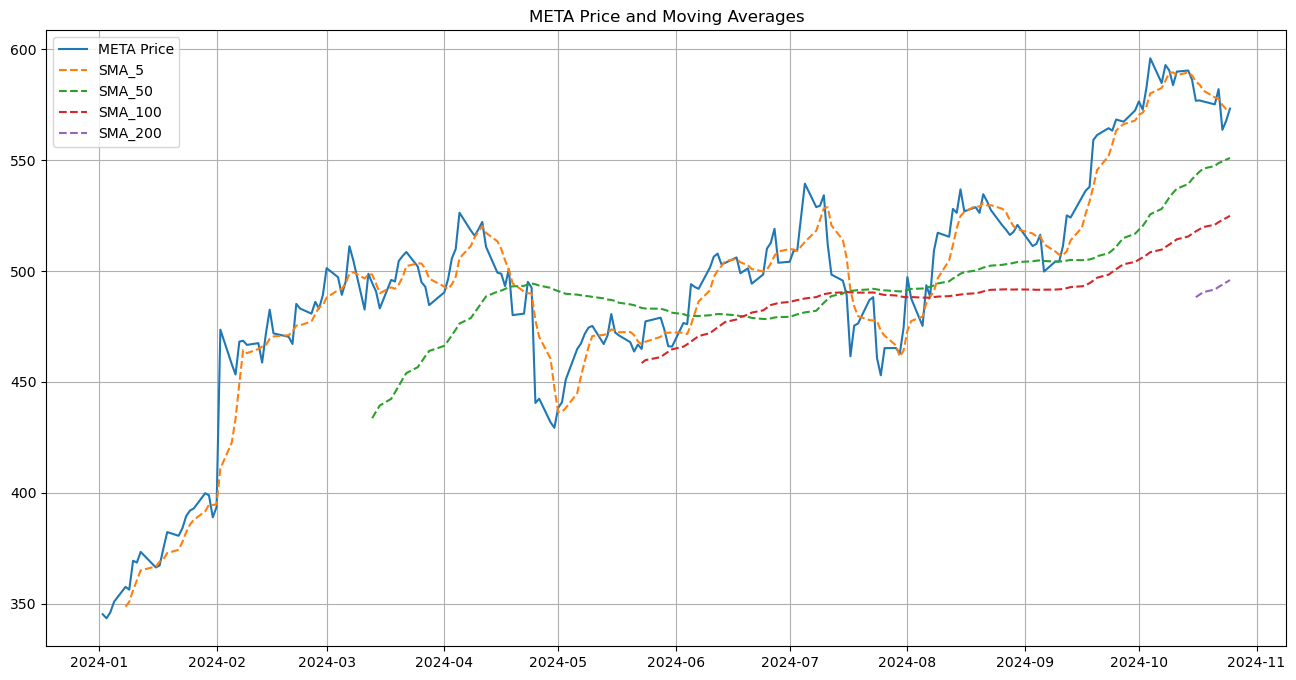

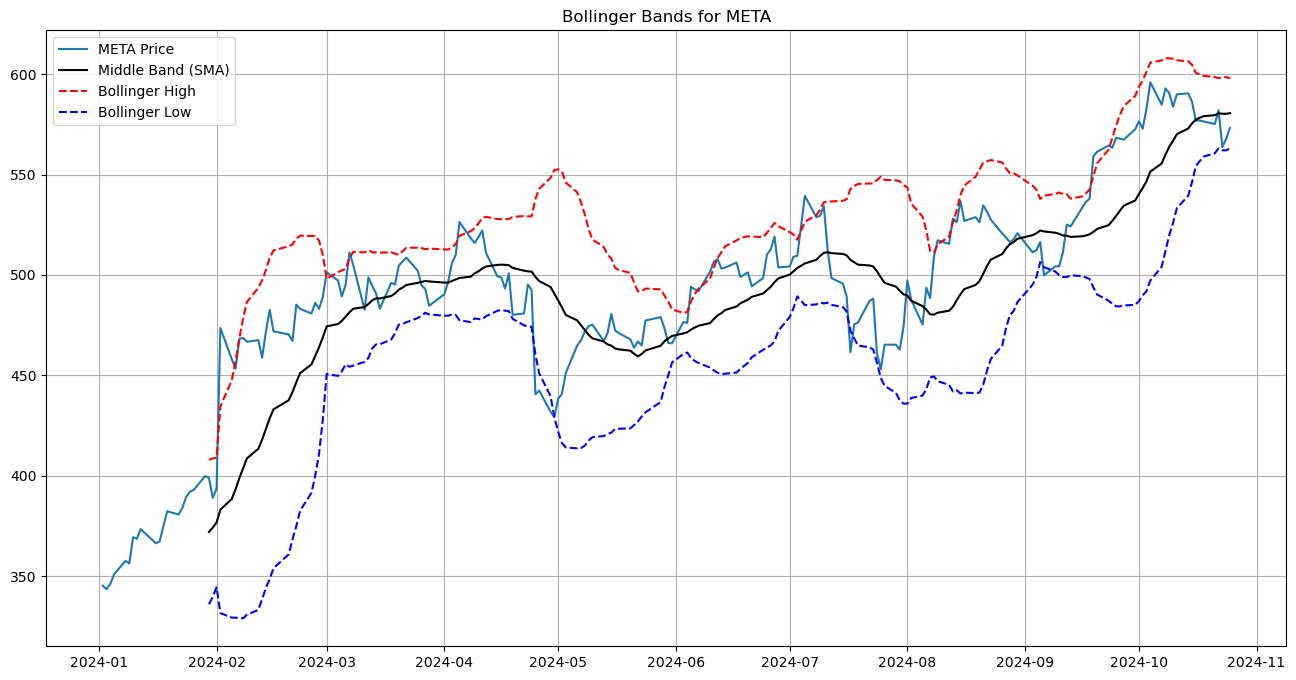

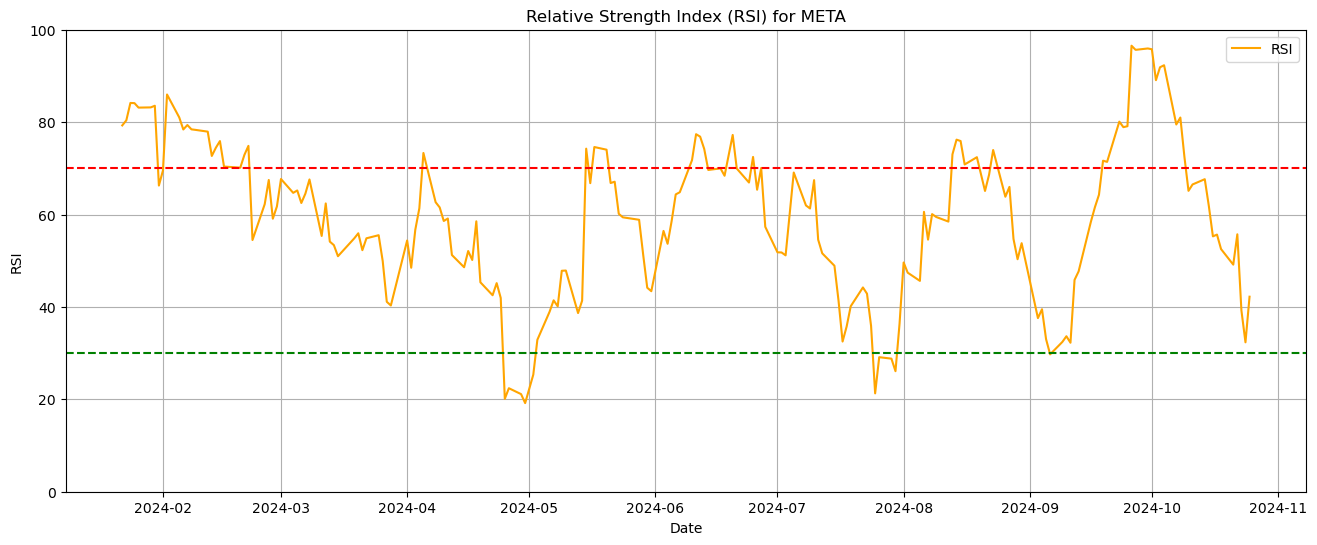

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the date range for data retrieval
start_date = "2024-01-01"
end_date = "2024-10-28"

# List of tickers to analyze
tickers = ['META', 'AAPL', 'TSLA', 'MSFT', 'SPY']

# Pull adjusted close price data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].fillna(method='ffill')
data.index = data.index.tz_localize(None)

# Function to calculate Bollinger Bands (with middle band)
def calculate_bollinger_bands(df, window=20, num_std_dev=2):
    rolling_mean = df.rolling(window=window).mean()  # Middle band
    rolling_std = df.rolling(window=window).std()    # Standard deviation

    bollinger_high = rolling_mean + (rolling_std * num_std_dev)  # Upper band
    bollinger_low = rolling_mean - (rolling_std * num_std_dev)   # Lower band

    return rolling_mean, bollinger_high, bollinger_low  # Return all three bands


# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    gain = pd.DataFrame(gain, index=df.index, columns=df.columns).rolling(window=window).mean()
    loss = pd.DataFrame(loss, index=df.index, columns=df.columns).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Simple Moving Averages (SMA)
def calculate_sma(df, windows=[5, 50, 100, 200]):
    sma_dict = {}
    for window in windows:
        sma_dict[f'SMA_{window}'] = df.rolling(window=window).mean()
    return sma_dict

# Function to plot indicators for each ticker, including the middle band
def plot_indicators(ticker_data, sma_data, bollinger_data, rsi_data, ticker):
    # Plot Price and Moving Averages
    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(ticker_data, label=f'{ticker} Price')
    for sma_label, sma_series in sma_data.items():
        plt.plot(sma_series, label=sma_label, linestyle='--')
    plt.title(f'{ticker} Price and Moving Averages')
    plt.legend()
    plt.grid()
    plt.show()

    # Plotting Bollinger Bands (with middle band)
    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(ticker_data, label=f'{ticker} Price')
    plt.plot(bollinger_data[0], label='Middle Band (SMA)', linestyle='-', color='black')  # Middle Band
    plt.plot(bollinger_data[1], label='Bollinger High', linestyle='--', color='red')      # Upper Band
    plt.plot(bollinger_data[2], label='Bollinger Low', linestyle='--', color='blue')      # Lower Band
    plt.title(f'Bollinger Bands for {ticker}')
    plt.legend()
    plt.grid()
    plt.show()

    # Plotting RSI
    plt.figure(figsize=(16, 6), dpi=100)
    plt.plot(rsi_data, label='RSI', color='orange')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title(f'Relative Strength Index (RSI) for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.ylim(0, 100)
    plt.legend()
    plt.grid()
    plt.show()

# Process and plot for each ticker individually
def process_and_plot_ticker(ticker):
    # Create a DataFrame for the current ticker
    ticker_data = data[[ticker]].copy()  # Select only the current ticker

    # Calculate indicators

    sma_data = calculate_sma(ticker_data)
    bollinger_mean, bollinger_high, bollinger_low = calculate_bollinger_bands(ticker_data)
    rsi_data = calculate_rsi(ticker_data)

    # Plot all indicators
    plot_indicators(ticker_data, sma_data, (bollinger_mean, bollinger_high, bollinger_low), rsi_data, ticker)

#Change the ticker symbol for the stock you want
process_and_plot_ticker('META')

In [4]:
import yfinance as yf

dummy = '2024-09-30'
ticker = 'META'
now = '2024-10-28'

# Download adjusted close prices
data3 = yf.download(ticker, start=dummy, end=now)['Adj Close'].ffill()

# Print adjusted close prices
print(f"\nThe adjusted close price for {ticker} from {dummy} to {now}:")
print(data3)

# Download volume data
volume_data = yf.download(ticker, start=dummy, end=now)['Volume']
volume_data2 = yf.download(ticker, start="2024-01-01", end=now)['Volume']

# Calculate average volumes
average_volume = volume_data.mean().item() if not volume_data.empty else 0
average_volume2 = volume_data2.mean().item() if not volume_data2.empty else 0

# Print average volumes with formatting
print(f"\nAverage volume for {ticker} from {dummy} to {now}: {average_volume:,.0f}")
print(f"\nAverage volume for {ticker} from '2024-01-01' to {now}: {average_volume2:,.0f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


The adjusted close price for META from 2024-09-30 to 2024-10-28:
Date
2024-09-30    572.440002
2024-10-01    576.469971
2024-10-02    572.809998
2024-10-03    582.770020
2024-10-04    595.940002
2024-10-07    584.780029
2024-10-08    592.890015
2024-10-09    590.510010
2024-10-10    583.830017
2024-10-11    589.950012
2024-10-14    590.419983
2024-10-15    586.270020
2024-10-16    576.789978
2024-10-17    576.929993
2024-10-18    576.469971
2024-10-21    575.159973
2024-10-22    582.010010
2024-10-23    563.690002
2024-10-24    567.780029
2024-10-25    573.250000
Name: Adj Close, dtype: float64

Average volume for META from 2024-09-30 to 2024-10-28: 10,050,175

Average volume for META from '2024-01-01' to 2024-10-28: 15,078,849


## Heikin Ashi Calculation

- (Refer to Investopedia for more details)

[Investopedia - Heikin Ashi](https://www.investopedia.com/trading/heikin-ashi-better-candlestick/)

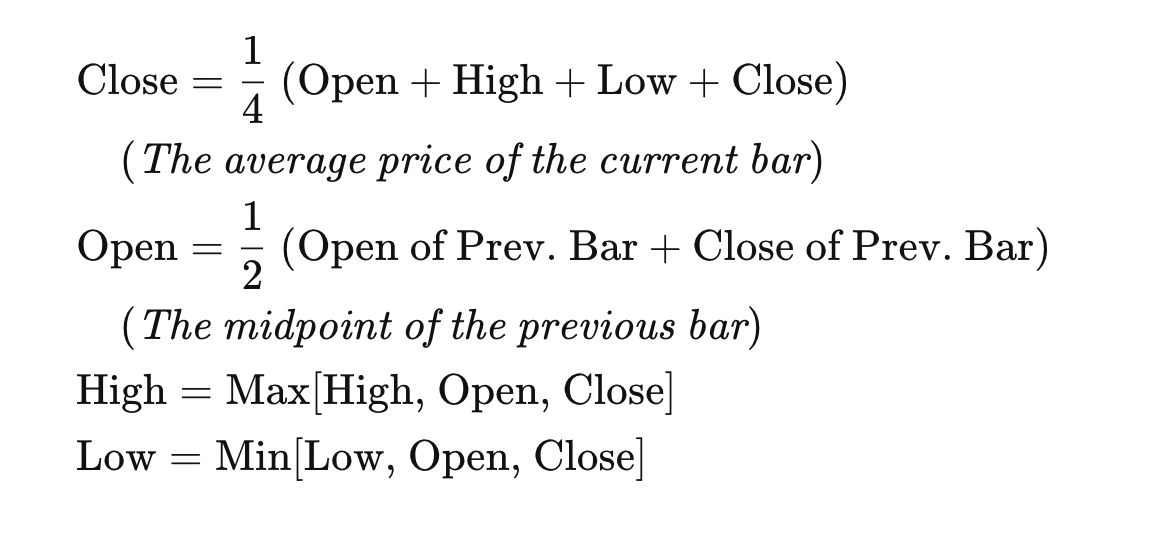

### Formulas:

- **Open**: (Open (previous candle) + Close (previous candle))/2
- **Close**: (Open + Low + Close + High)/4
- **High**: Same as the actual candle
- **Low**: Same as the actual candle


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from mpl_finance import candlestick_ohlc

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

name = 'META'
ticker = yf.Ticker(name)
df = ticker.history(interval="1d",start="2024-01-01",end="2024-10-28")
df['Date'] = range(df.shape[0])
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

def plot_chart(df):
    fig, ax = plt.subplots()
    candlestick_ohlc(ax,df.values,width=0.6,colorup='green', colordown='red', alpha=0.8)
    fig.tight_layout()
    fig.show()


/var/folders/j1/75z7rb151yjd4wx7mng3z3fm0000gn/T/ipykernel_29451/3037862366.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


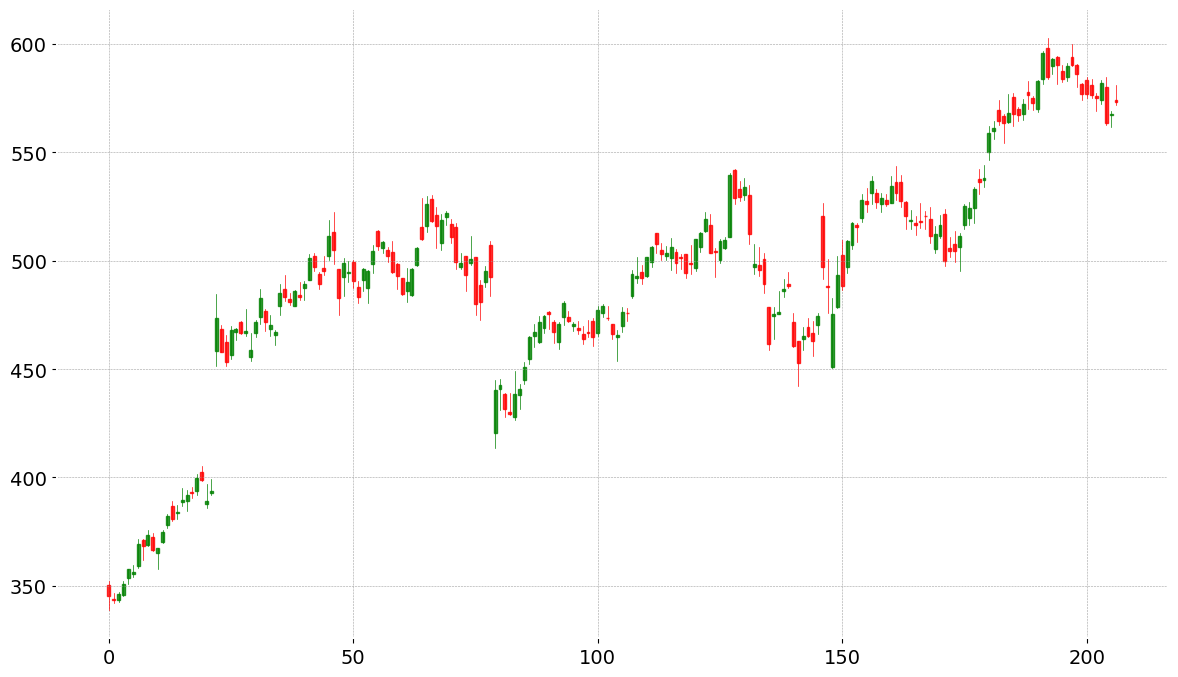

In [96]:
plot_chart(df)

In [102]:
# Assuming df is your DataFrame with 'Open', 'Close', 'Low', 'High' columns
df_ha = df.copy()

# Iterate through the DataFrame
for i in range(df_ha.shape[0]):
    if i > 0:
        # Use iloc to access the previous row's Open and Close values
        df_ha.loc[df_ha.index[i], 'Open'] = (df_ha.iloc[i - 1]['Open'] + df_ha.iloc[i - 1]['Close']) / 2
    
    # Calculate the Close using iloc to avoid the deprecation warning
    df_ha.loc[df_ha.index[i], 'Close'] = (df_ha.iloc[i]['Open'] + df_ha.iloc[i]['Close'] + df_ha.iloc[i]['Low'] + df_ha.iloc[i]['High']) / 4

# Remove the first row (as it's not valid for Heikin-Ashi)
df_ha = df_ha.iloc[1:, :]

# Display the first few rows of the Heikin-Ashi DataFrame
print(df_ha.head())


                           Date        Open        High         Low  \
Date                                                                  
2024-01-03 00:00:00-05:00     1  348.458359  346.905539  342.149838   
2024-01-04 00:00:00-05:00     2  346.847893  347.104910  342.369168   
2024-01-05 00:00:00-05:00     3  346.223944  352.438829  345.220572   
2024-01-08 00:00:00-05:00     4  347.459076  357.902421  350.993200   
2024-01-09 00:00:00-05:00     5  350.471797  359.557411  354.293232   

                                Close  
Date                                   
2024-01-03 00:00:00-05:00  345.237428  
2024-01-04 00:00:00-05:00  345.599994  
2024-01-05 00:00:00-05:00  348.694209  
2024-01-08 00:00:00-05:00  353.484518  
2024-01-09 00:00:00-05:00  355.169866  


/var/folders/j1/75z7rb151yjd4wx7mng3z3fm0000gn/T/ipykernel_29451/3037862366.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


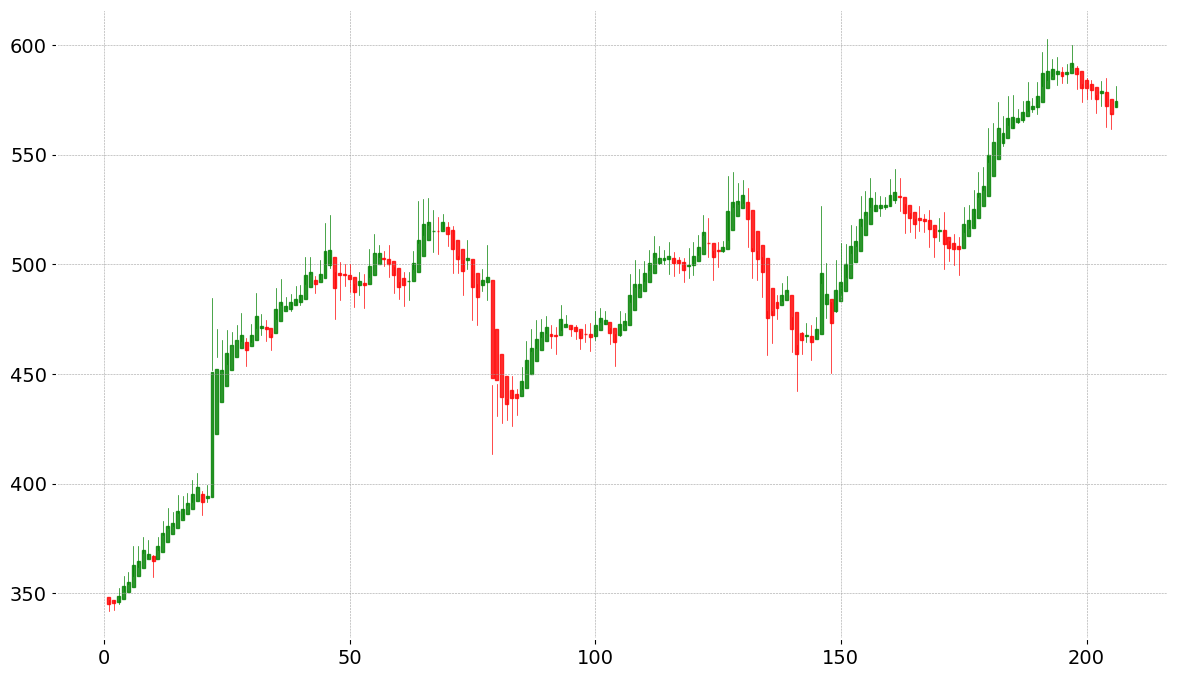

In [104]:
plot_chart(df_ha)

## Renko Chart 


The Average True Range is specified with the below formula, in short, it is calculated by calculating three ranges

* High Price (for that day) - Low Price (for that day)

* High Price (for that day) - Adjusted Close (for the previous day)

* Low Price (for that day) - Adjusted Close (for the previous day)

MAX of all the three above is our True Range, we calculate this True Range for a number of days and then use the Average of this True Range as Average True Range (ATR)

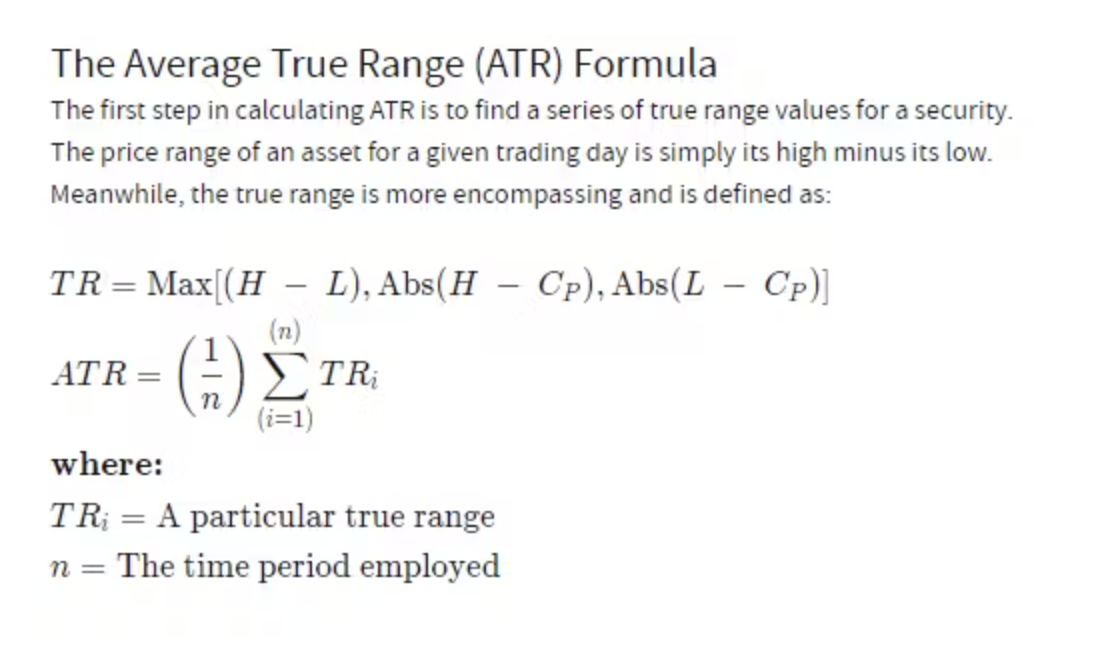


SOURCE: https://www.investopedia.com/terms/a/atr.asp
